## For people who care about HEALTHY food

Are you like me, always enjoy a cup of cappuccino or latte in the morning? Without coffee in the morning, a beautiful new day will never begin. That's why we all love Starbucks. The enchanting aroma, the dizzying names, and the attractive price. When all of them are combined, it is tough to resist the charm of Starbucks drinks. But do you ever wonder whether it is a good thing for us to persistently pick up their drink at the store without any hesitation? Well, we will explore their ingredients today. Let's dive into the facts behind all those fancy drinks. We are lucky to obtain two data sets about their recipes. Let's check the calories, sodium, fat and Carb concentrations first.
![Starbucks drink](https://64.media.tumblr.com/tumblr_mbpi4zkluw1rvw986o6_500.gif)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import data
url='Starbucks/starbucks-menu-nutrition-drinks.csv'
df=pd.read_csv(url, na_values='-')
df.rename(columns={'Unnamed: 0':'drink'}, inplace=True)
df.columns

Index(['drink', 'Calories', 'Fat (g)', 'Carb. (g)', 'Fiber (g)', 'Protein',
       'Sodium'],
      dtype='object')

In [2]:
df=df.dropna(thresh=6, axis=0)#remove obs with all missing nutrition values
#the quantile distribution of general nutritions
df_q=df.quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

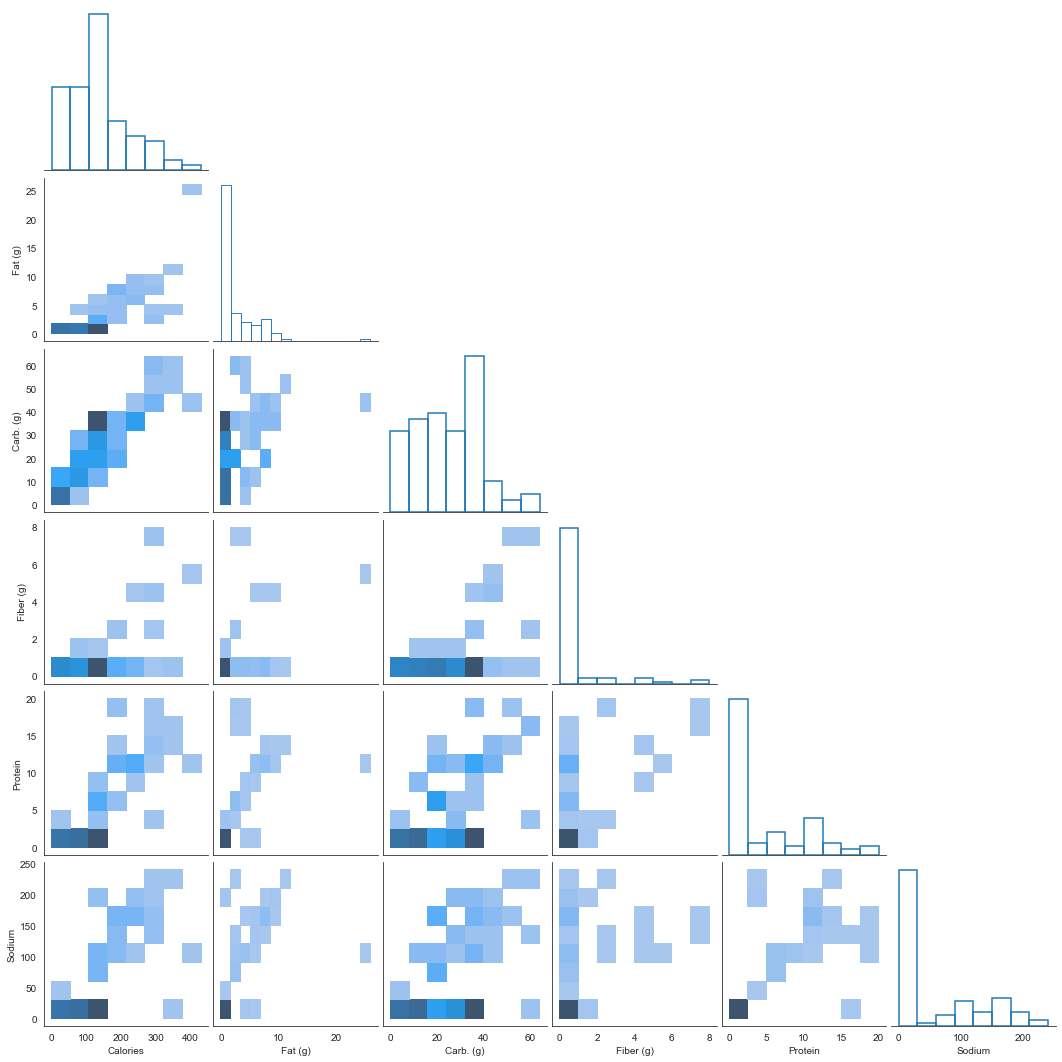

In [3]:
#correlation between these variables
sns.set_style('white')
sns.pairplot(df.drop('drink', axis=1), diag_kws=dict(fill=False), kind='hist', corner=True)

We can find the high correlation between calories and carbs in this data set. It means drinks with high calories tend to have high carbs. But this plot doesn't help much for us to determine the calories concentration in Starbucks drinks. Let's check the cdf plots. It can give us more insight.

<AxesSubplot:ylabel='Proportion'>

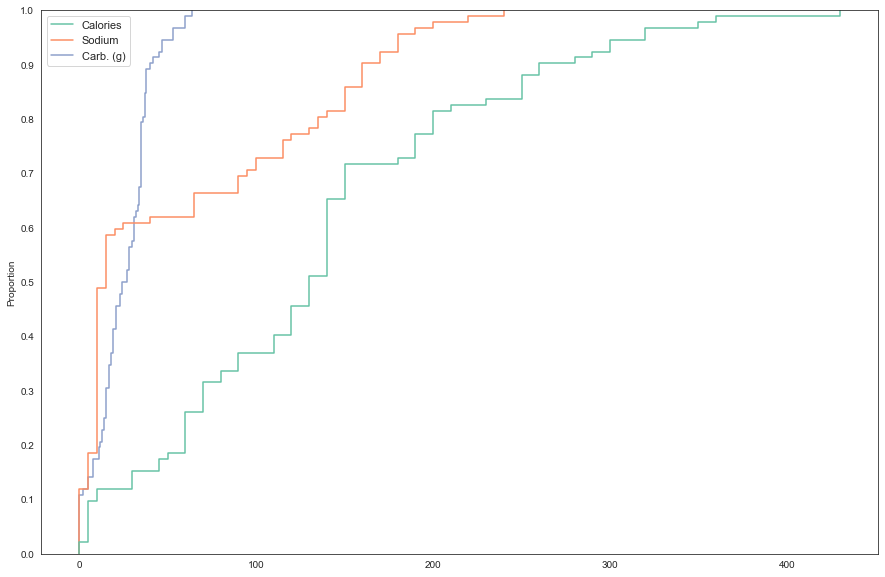

In [12]:
#The cdf distribution
fig, ax = plt.subplots(figsize=(15, 10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
cp=sns.color_palette("Set2")
sns.set_theme(context='notebook', palette=cp)
sns.set_style('whitegrid')
sns.ecdfplot(data=df[['Calories','Sodium', 'Carb. (g)']], ax=ax)

Well, this plot told us that more than 60% of Starbucks drinks have calories levels more than 100/12oz 

<AxesSubplot:ylabel='Proportion'>

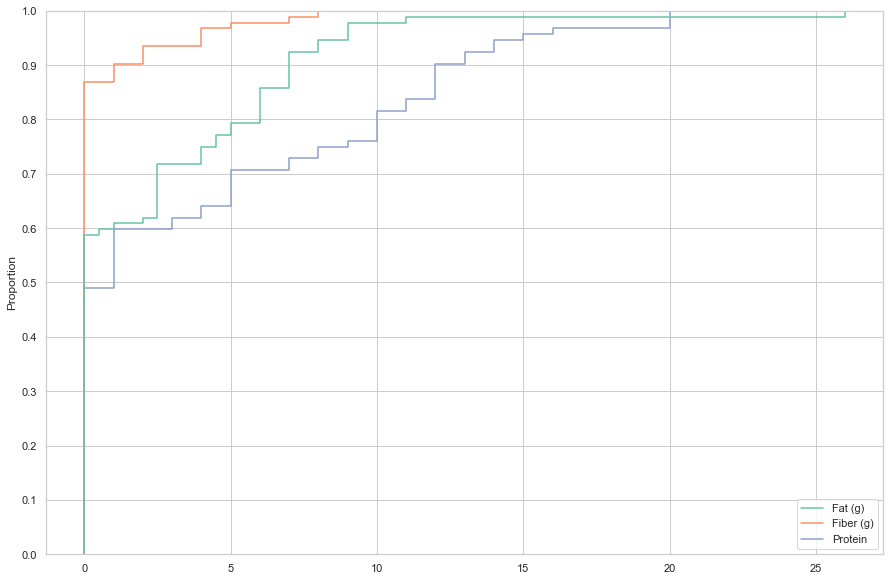

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
sns.ecdfplot(data=df[['Fat (g)', 'Fiber (g)', 'Protein']], ax=ax)

Meanwhile, almost half of starbucks beverage have zero fat, fiber and protein. Obviously, most Starbucks drinks are not high in nutritions. Neither their fiber and protein content is high. But their calory is high. 100 calories/12 ounce equals 6~8 teaspoon sugars. If all these calories come from sugra, we will have trouble, because most Starbucks drinks will be similar to sweet tea. 

✔️Fact from [CDC](https://www.cdc.gov/healthyweight/healthy_eating/drinks.html) told us: People who often drink sugary drinks are more likely to face chronic disease, such as obesity, type 2 diabetes, heart disease, kidney diseases and non-alcoholic liver disease. I guess most of us just didn't realize how much sugar or calories are in our beverage.

![sugar](sugar.jpg)

Well, we need more data to find the answer to our questions. Let's dive into another data set.

## For people suffering from DECIDOPHOBIA

![the complicated Starbucks drinks](https://www.pngkey.com/png/full/574-5746860_starbucks-frappuccino-cartoon.png)

### Considering the overwhelming options Starbucks give us, is it possible for us find a healthy drink?

#### Let's clean up the messy data before we dive in the BIG question, shall we? 
<img src=https://thumbs.gfycat.com/SimplisticDelightfulCod-max-1mb.gif width="200">

In [4]:
url2='Starbucks/starbucks_drinkMenu_expanded.csv'
df2=pd.read_csv(url2, na_values=['varies','Varies'])
df2=df2.fillna(0)
df2=df2.drop(158, axis=0)#For all above drinks except 158, we can use 0 to replace the missing data. But we cannot do it for drink 158, because it is a brewed coffee. So we delete it directly
def remove(string): 
    return string.replace(" ", "") 
col_names=[remove(i) for i in df2.columns]
columns_dic=dict(zip(df2.columns, col_names))
df2=df2.rename(columns_dic, axis=1)
df2_obj=df2.select_dtypes(include=['object'])
ber=df2_obj.filter(like='Beverage').columns
df2_ob=df2_obj.drop(ber, axis=1)
df2_rest=df2.drop(df2_ob.columns, axis=1)
#Then we need replace "3 2" at position 236 with "32"
df2_ob['TotalFat(g)']=df2_ob['TotalFat(g)'].replace('3 2', '32')
# Convert object data into numerical
df2_ob=df2_ob.applymap(lambda x: np.float(str(x).replace('%', '')))
df2_new=pd.concat([df2_rest, df2_ob], axis=1)

#### When we mention healthy drink, there are three to four ingredients we care most in the point of view of nutritions, sugar, caffeine and transfat. Let's check the concentration of these three in Starbucks drink first

<img src=https://i.pinimg.com/originals/fb/fd/04/fbfd042edca5a485a3a29357f9c78b33.png width="200">

✔️Fact check with FDA: Over-consuming caffeine can cause many problems,including insomnia, anxiousness, fast heart rate, upset stomach, etc. Because there are toxic amounts of caffeine that can induce serious health consequences in adults, [FDA](https://www.fda.gov/consumers/consumer-updates/spilling-beans-how-much-caffeine-too-much#:~:text=For%20healthy%20adults%2C%20the%20FDA,it%20(break%20it%20down)) suggested 400 milligrams a day for a healthy adult—that's about four or five cups of coffee—as an amount not generally associated with dangerous, negative effects. Then we can ask how much caffeine are in the Starbucks drinks. Is it a healthy behavior to drink Starbucks as our morning routine?

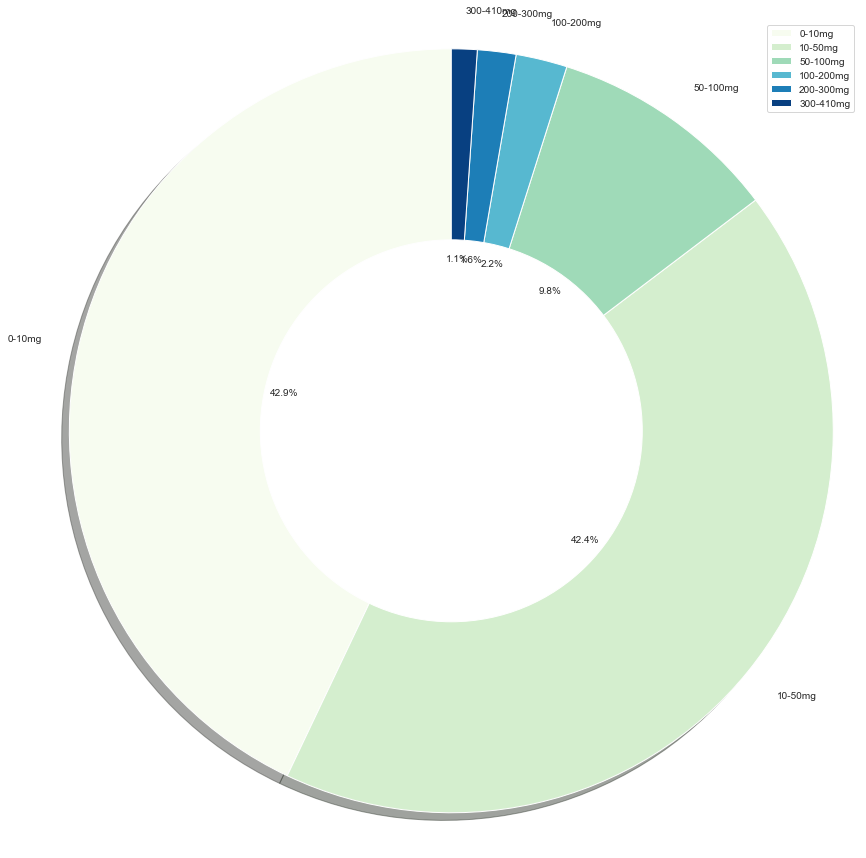

In [6]:
bins=[0, 10, 50, 100, 200, 300, 410]
labels=['0-10mg', '10-50mg', '50-100mg', '100-200mg', '200-300mg', '300-410mg']
ca_starbucks=pd.cut(df2_new['Caffeine(mg)'], bins=bins, labels=labels, right = True).to_frame()
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
ca=ca_starbucks.value_counts()
fig1, ax1 = plt.subplots(figsize=(12,12))
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0., 1., len(labels)))
ax1.pie(ca, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, pctdistance=0.45, labeldistance=1.1, colors=colors)
#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.rcParams.update({'font.size':10})
plt.legend()
plt.show()

Fortunately, we don't need worry about caffeine in Starbucks drinks so much, because most of their drinks (~80%) have caffeine less than 50 mg. It is far less than 400 miligram limit. Only grande and venti brewed coffee have caffeine level more than 300 miligram.

✔️How about the sugar concentration in their drinks? Should we concern about it? 
Fact check with [the American Heart Association](https://www.hsph.harvard.edu/nutritionsource/carbohydrates/added-sugar-in-the-diet/): An added-sugar limit of no more than 24 grams per day for most women and no more than 36 grams per day for most men are recommended.

In [7]:
df2_new['Sugars(g)'].describe()

count    241.000000
mean      33.024896
std       19.747558
min        0.000000
25%       18.000000
50%       32.000000
75%       44.000000
max       84.000000
Name: Sugars(g), dtype: float64

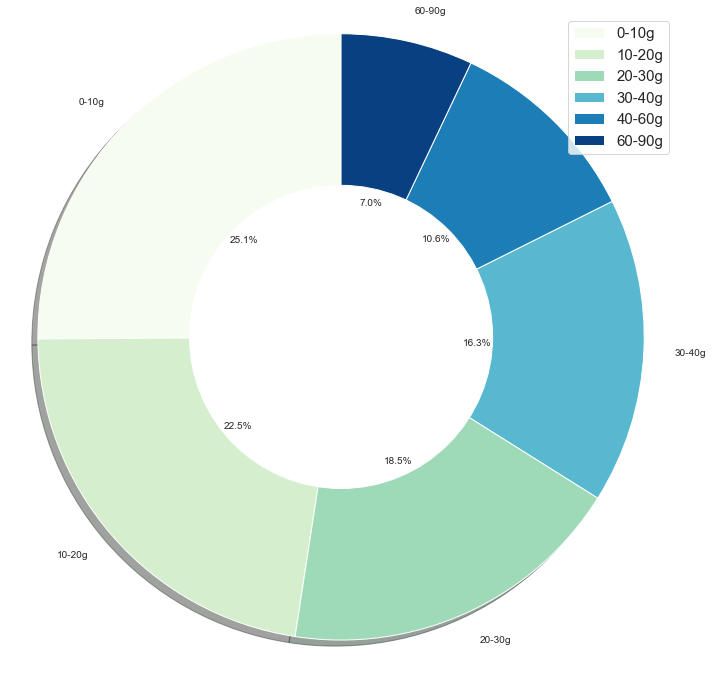

In [8]:
bins=[0, 10, 20, 30, 40, 60, 90]
labels=['0-10g', '10-20g', '20-30g', '30-40g', '40-60g', '60-90g']
su_starbucks=pd.cut(df2_new['Sugars(g)'], bins=bins, labels=labels, right = True).to_frame()
su=su_starbucks.value_counts()
fig1, ax1 = plt.subplots(figsize=(12,12))
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0., 1., len(labels)))
ax1.pie(su, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors,  pctdistance=0.45, labeldistance=1.1)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams.update({'font.size':15})
plt.legend()
plt.show()

~50% of Starbucks drinks have sugar concentration less than 20g. It is not bad. We also should pay attention to the thirty percentage high sugar content drinks, especially for people suffering from diabetes and cardivascular disease.

✔️How about their trans fat content? Should we concern about it too? Fact check from [FDA](https://www.fda.gov/food/food-additives-petitions/trans-fat): Trans fats intake can raise the level of bad cholesterol (LDL) in the blood. Then it can cause cholesterol to build up in the blood vessels and induce cardivascular diseases. THerefore, FDA has taken actions to remove them in food market since 2015. 

In [10]:
df2_new[['TransFat(g)']].describe()

,TransFat(g)
count,241.000000
mean,1.310373
std,1.642843
min,0.000000
25%,0.100000
50%,0.500000
75%,2.000000
max,9.000000


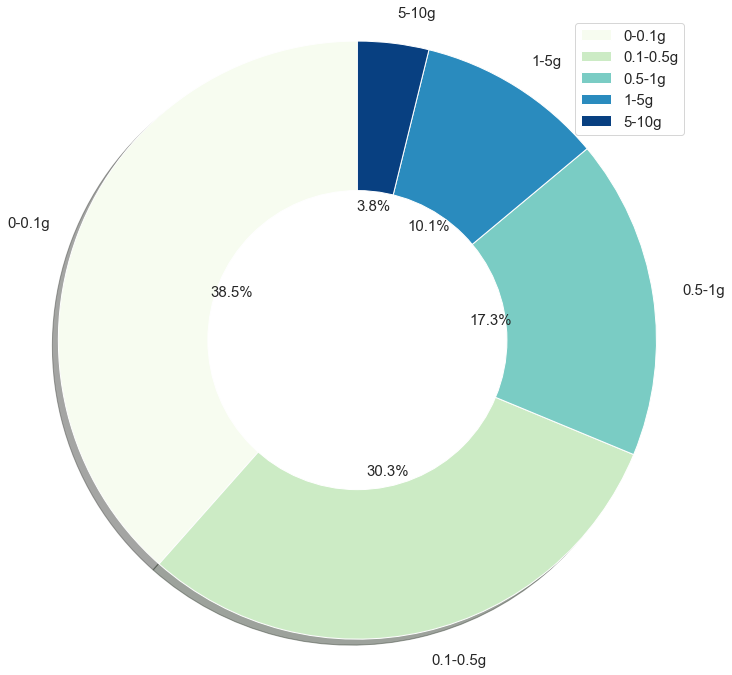

In [11]:
bins=[0, 0.1, 0.5, 1, 5, 10]
labels=['0-0.1g', '0.1-0.5g', '0.5-1g', '1-5g', '5-10g']
tr_starbucks=pd.cut(df2_new['TransFat(g)'], bins=bins, labels=labels, right = True).to_frame()
tr=tr_starbucks.value_counts()
fig1, ax1 = plt.subplots(figsize=(12,12))
cmap = plt.cm.GnBu
colors = cmap(np.linspace(0., 1., len(labels)))
ax1.pie(tr, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors,  pctdistance=0.45, labeldistance=1.1)
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.rcParams.update({'font.size':15})
plt.legend()
plt.show()

Well, ~40% drinks have less than 0.1g trans fat at Starbucks. But there  are also ~15% drinks with trans fat > 1g. 


### In summary, please keep proper social distance with the following drinks
<img src=https://i.pinimg.com/474x/c7/b5/33/c7b533f5eecf070470d279b293f4acab.jpg width="150">

In [12]:
#high sugar drinks
df2_new[df2_new['Sugars(g)'] > 40]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
25,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),Venti Nonfat Milk,280,2.0,0.0,10,160,54,2,44,17.0,180.0,3.0,25.0,0.0,45.0,30.0
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,6.0,0.2,30,180,53,2,43,17.0,180.0,11.0,20.0,2.0,45.0,30.0
37,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),Venti Nonfat Milk,250,0.2,0.0,10,180,47,0,45,15.0,150.0,0.3,25.0,0.0,50.0,0.0
38,Classic Espresso Drinks,Vanilla Latte (Or Other Flavoured Latte),2% Milk,320,4.5,0.3,35,200,46,0,44,15.0,150.0,9.0,25.0,2.0,45.0,0.0
71,Signature Espresso Drinks,Caramel Macchiato,Venti Nonfat Milk,240,1.0,0.0,10,170,43,0,41,13.0,150.0,1.0,25.0,0.0,40.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,240,0.2,0.0,0,180,51,1,49,3.0,0.0,2.0,4.0,6.0,15.0,8.0
235,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Venti Nonfat Milk,310,0.1,0.0,5,260,70,0,69,6.0,0.0,0.2,10.0,8.0,20.0,4.0
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,350,3.0,0.2,15,260,70,0,68,6.0,0.0,6.0,8.0,8.0,20.0,4.0
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,0.4,0.0,0,250,67,1,64,5.0,0.0,32.0,6.0,8.0,20.0,10.0


In [13]:
#high trans fat drinks
df2_new[df2_new['TransFat(g)']>5]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
26,Classic Espresso Drinks,Caffè Mocha (Without Whipped Cream),2% Milk,340,6.0,0.2,30,180,53,2,43,17.0,180.0,11.0,20.0,2.0,45.0,30.0
78,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,310,6.0,0.1,20,200,46,0,44,11.0,75.0,9.0,15.0,2.0,35.0,0.0
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,400,7.0,0.2,25,250,61,0,58,15.0,150.0,11.0,15.0,2.0,45.0,0.0
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti Nonfat Milk,450,6.0,0.0,10,310,78,0,74,19.0,150.0,7.0,25.0,2.0,60.0,2.0
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),2% Milk,510,9.0,0.2,35,330,77,0,74,19.0,150.0,15.0,20.0,4.0,60.0,2.0
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Soymilk,460,6.0,0.0,5,290,70,1,64,16.0,150.0,13.0,15.0,2.0,60.0,20.0
96,Signature Espresso Drinks,Hot Chocolate (Without Whipped Cream),2% Milk,380,6.0,0.3,35,200,63,2,54,17.0,30.0,11.0,25.0,2.0,50.0,30.0
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,7.0,0.2,15,340,90,2,84,7.0,145.0,10.0,6.0,0.0,15.0,35.0


In [14]:
#high caffeine drinks
df2_new[df2_new['Caffeine(mg)'] > 300]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
2,Coffee,Brewed Coffee,Grande,5,0.0,0.0,0,10,0,0,0,1.0,330.0,0.1,0.0,0.0,0.0,0.0
3,Coffee,Brewed Coffee,Venti,5,0.0,0.0,0,10,0,0,0,1.0,410.0,0.1,0.0,0.0,2.0,0.0


Fortunately, we don't find the beverage with all high concentration of caffeine, sugar and trans fat.

### We should pay attention to those healthy choices at Starbucks
<img src=https://webstockreview.net/images/smiley-face-clip-art-heart-1.png width="150">

In [15]:
df2_new[(df2_new['Sugars(g)']==0) & (df2_new['Caffeine(mg)'] == 0) & (df2_new['TransFat(g)']==0)]

,Beverage_category,Beverage,Beverage_prep,Calories,TransFat(g),SaturatedFat(g),Sodium(mg),TotalCarbohydrates(g),Cholesterol(mg),DietaryFibre(g),Sugars(g),Protein(g),Caffeine(mg),TotalFat(g),VitaminA(%DV),VitaminC(%DV),Calcium(%DV),Iron(%DV)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Well, it is time to know our new friend, TEA.
<img src=http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/teacup-without-handle.png width="150">

### At the end of the story, we still have a question. Is it a practical for us to decide the healthy choice simply based on the drink category at Starbucks?

<AxesSubplot:>

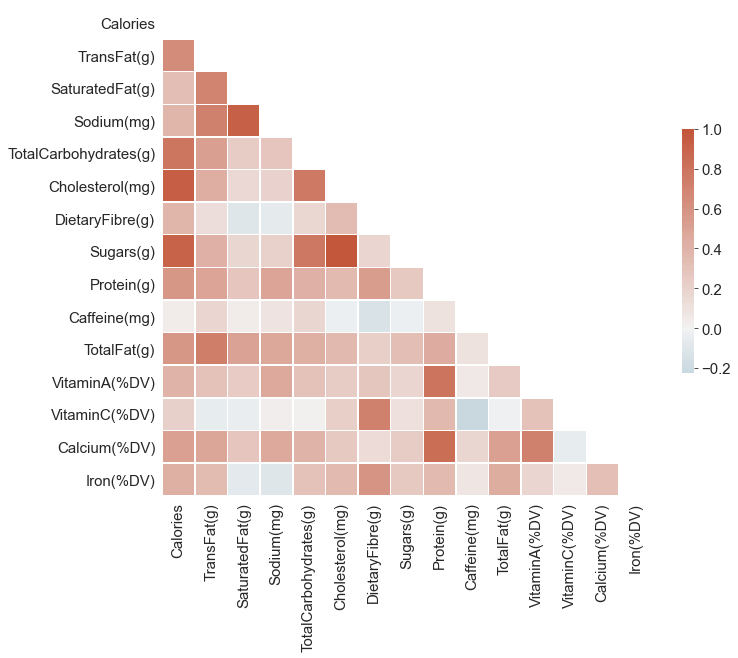

In [16]:
#PCA analysis for better data visualization
df2_new_pca=df2_new.iloc[:, 3:]
corr=df2_new_pca.corr().round(3)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
#center is the value at which to center the colormap when plotting divergant data. 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
st_scaler=StandardScaler()
X=st_scaler.fit_transform(df2_new_pca)
pca = PCA(n_components =2)
pca.fit(X)
X_reduced = pca.transform(X)
X_reduced = pd.DataFrame(X_reduced, columns=['pc1', 'pc2'])# we extracted two pcs that can explain ~70% variance in the original data.
PCA_df2=pd.concat([df2_new.iloc[:, :2], X_reduced, df2_new['Sugars(g)']], axis=1)
PCA_df2.Beverage_category.value_counts()

Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                17
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: Beverage_category, dtype: int64

These two pcs can explain ~70% variance in the original data.

Text(0.5, 1.0, 'Sugar concentatrations in Starbucks beverage with PC1 and PC2')

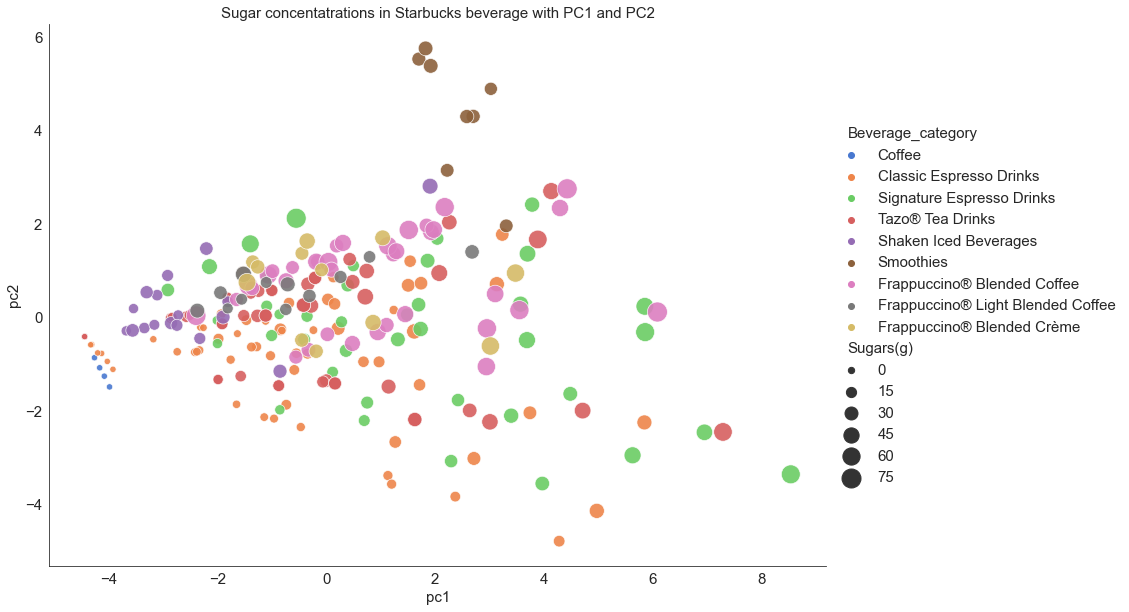

In [18]:
#Data visualization using pc1 and pc2
sns.relplot(x="pc1", y="pc2", hue="Beverage_category", alpha=.9, palette="muted", size="Sugars(g)",sizes=(40, 400), height=8.27, aspect=11.7/8.27, data=PCA_df2)
plt.title('Sugar concentatrations in Starbucks beverage with PC1 and PC2', fontsize=15)

Text(0.5, 1.0, 'Trans fat concentatrations in Starbucks beverage with PC1 and PC2')

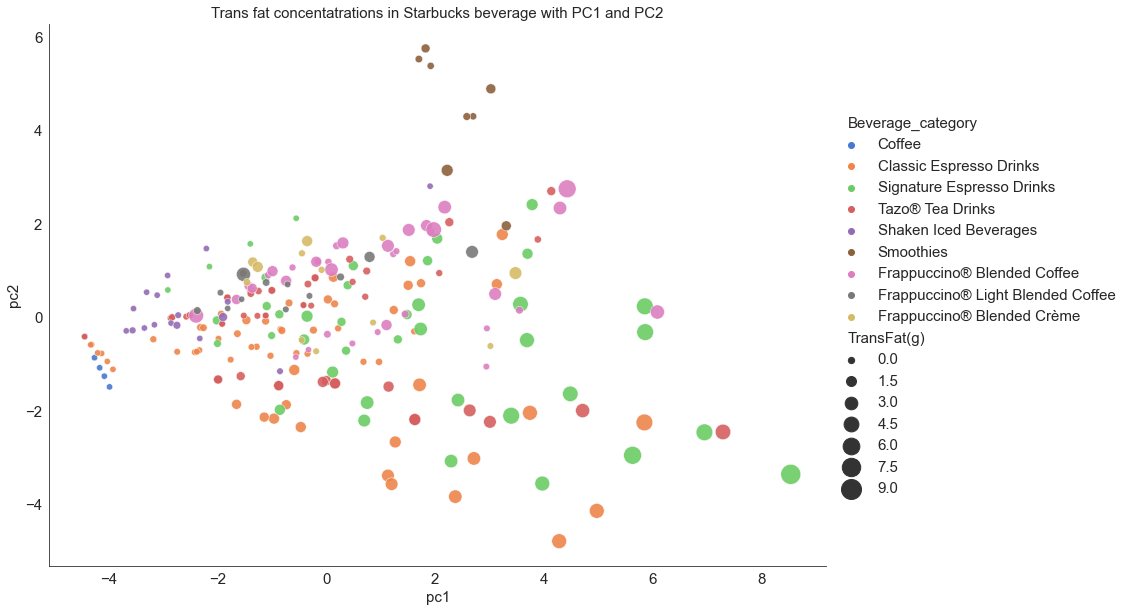

In [19]:
PCA_df2=pd.concat([df2_new.iloc[:, :2], X_reduced, df2_new['TransFat(g)']], axis=1)
sns.relplot(x="pc1", y="pc2", hue="Beverage_category", alpha=.9, palette="muted", size="TransFat(g)",sizes=(40, 400), height=8.27, aspect=11.7/8.27, data=PCA_df2)
plt.title('Trans fat concentatrations in Starbucks beverage with PC1 and PC2', fontsize=15)

Text(0.5, 1.0, 'Caffeine concentatrations in Starbucks beverage with PC1 and PC2')

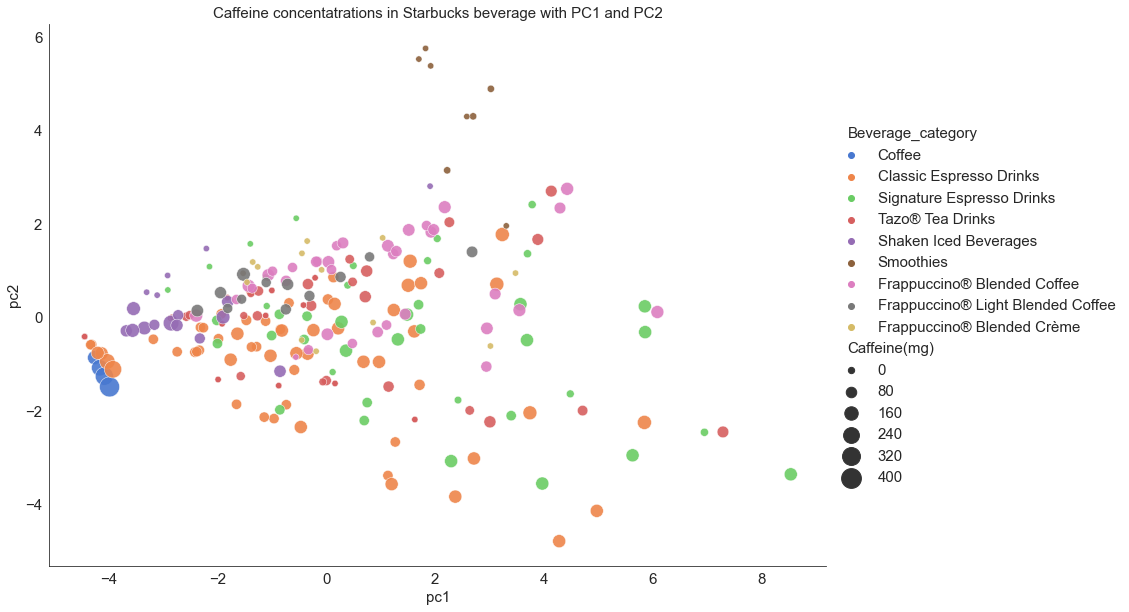

In [20]:
PCA_df2=pd.concat([df2_new.iloc[:, :2], X_reduced, df2_new['Caffeine(mg)']], axis=1)
sns.relplot(x="pc1", y="pc2", hue="Beverage_category", alpha=.9, palette="muted", size="Caffeine(mg)",sizes=(40, 400), height=8.27, aspect=11.7/8.27, data=PCA_df2)
plt.title('Caffeine concentatrations in Starbucks beverage with PC1 and PC2', fontsize=15)

#### Sadly, we can not make the proper decision only based on the beverage category.  Certain beverage category doesn't mean 100% healthy or unhealthy. Next time, we can try decision tree to help people make better decisions.
<img src=https://vortexpt.com/wp-content/uploads/2012/09/dizzy-emoji-cm.jpg width="200">
